In [36]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data.csv')

<Axes: >

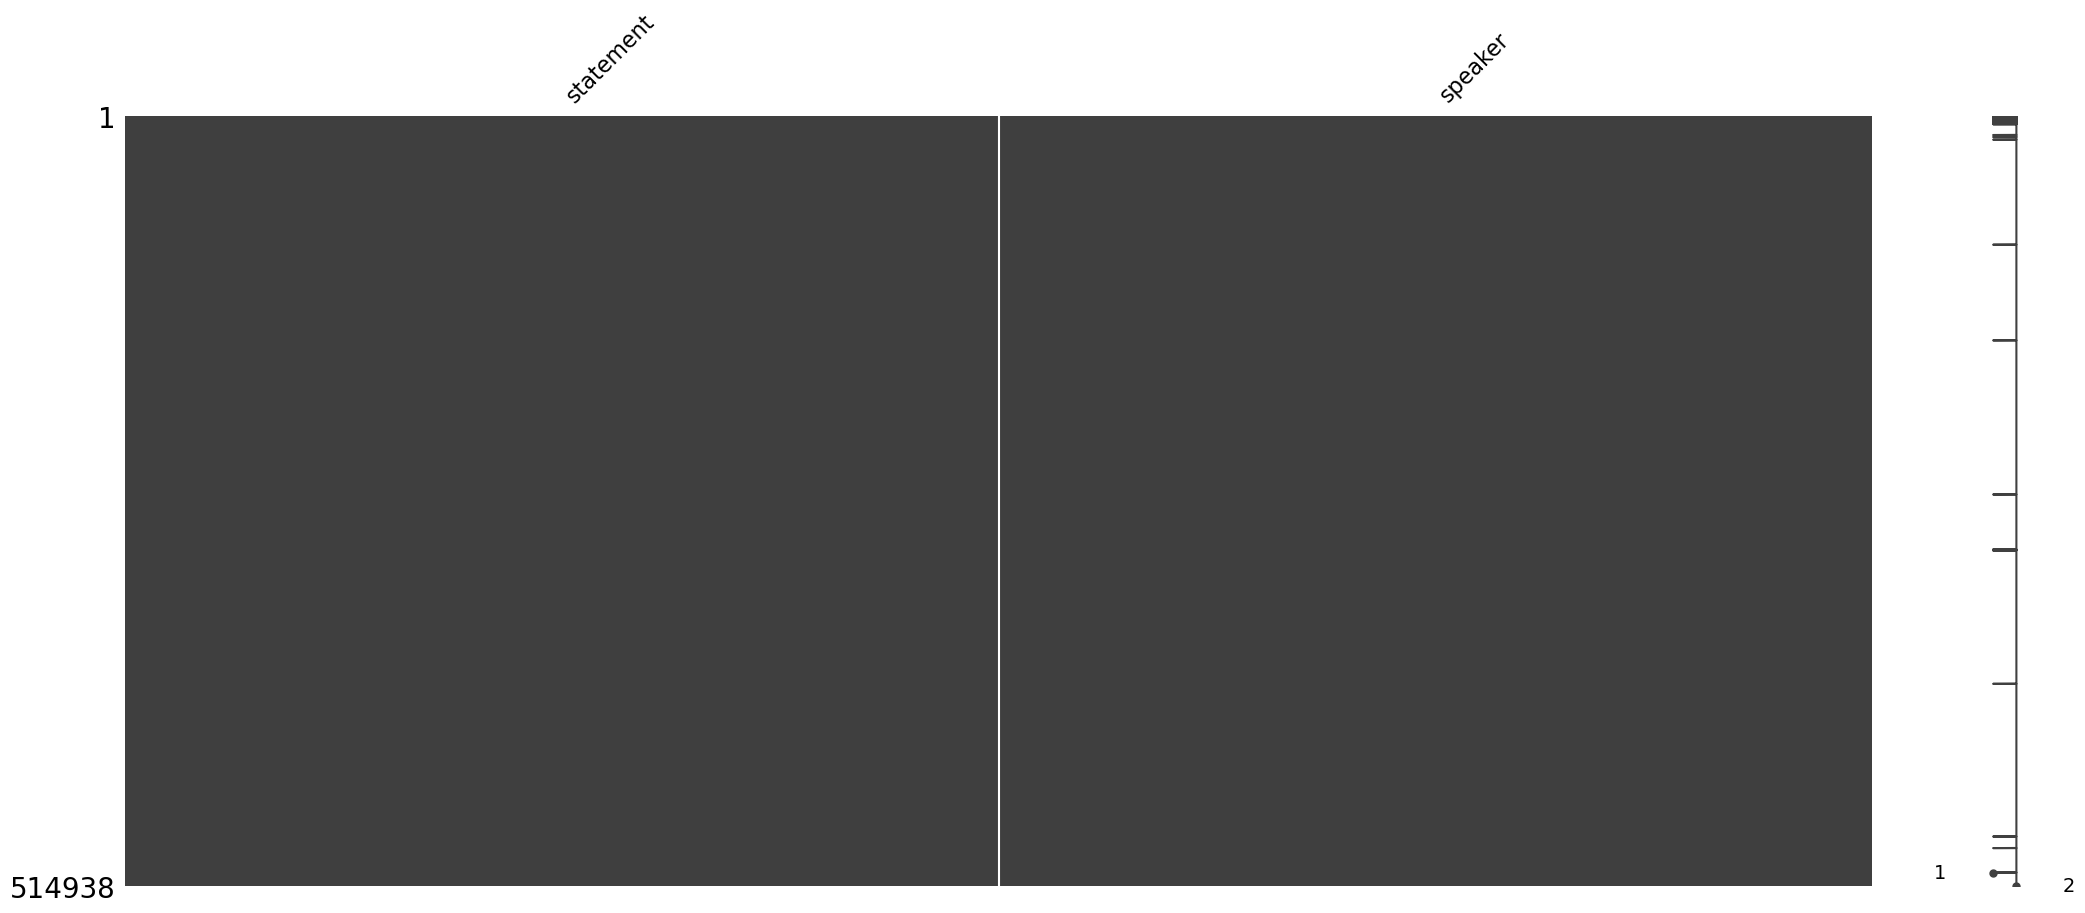

In [38]:
# Visualize missing values
msno.matrix(df)

In [39]:
df = df.dropna(subset=['statement'])

In [40]:
df.to_csv('data_cleaned.csv', index=False)

In [41]:
df = pd.read_csv('ML Models/data_cleaned.csv')

In [42]:
df.head()

,statement,speaker
0,"Hi doctor,I am just wondering what is abutting...",Patient
1,Hi. I have gone through your query with dilige...,Doctor
2,"Hi doctor, I am a 26 year old male. I am 5 fee...",Patient
3,Hello. I have gone through your information an...,Doctor
4,"Hello doctor, I am 48 years old. I am experien...",Patient


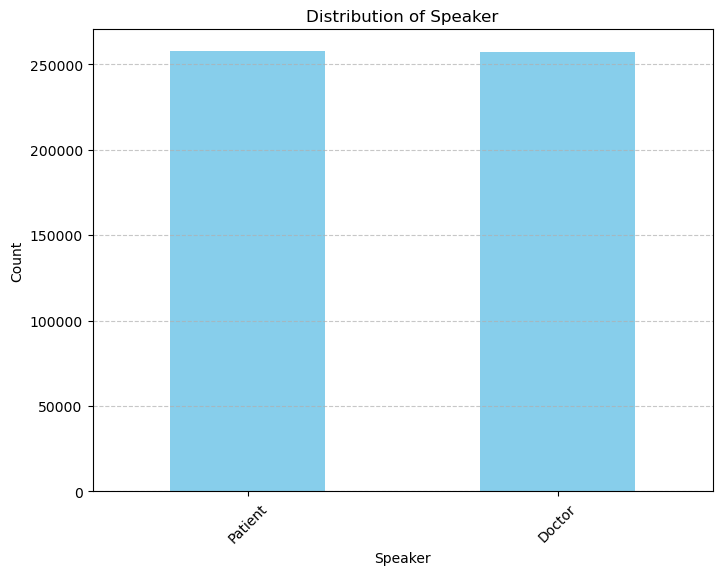

In [43]:
# Visualize the distribution of 'speaker' column
plt.figure(figsize=(8, 6))
df['speaker'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Speaker')
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

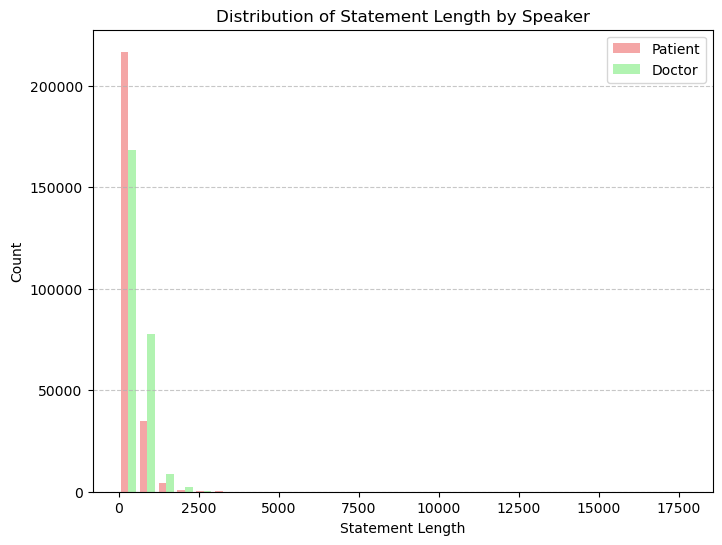

In [44]:
# Visualize the relationship between 'speaker' and 'statement' length
df['statement_length'] = df['statement'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist([df[df['speaker'] == 'Patient']['statement_length'], df[df['speaker'] == 'Doctor']['statement_length']], 
         bins=30, alpha=0.7, color=['lightcoral', 'lightgreen'], label=['Patient', 'Doctor'])
plt.title('Distribution of Statement Length by Speaker')
plt.xlabel('Statement Length')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Checking for outliers

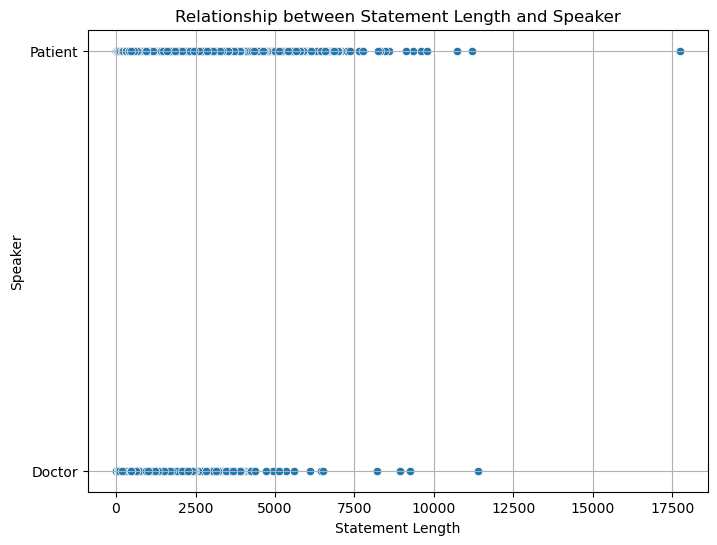

In [45]:
# Scatter plot to visualize the relationship between 'statement_length' and 'speaker'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='statement_length', y='speaker', data=df)
plt.title('Relationship between Statement Length and Speaker')
plt.xlabel('Statement Length')
plt.ylabel('Speaker')
plt.grid(True)
plt.show()

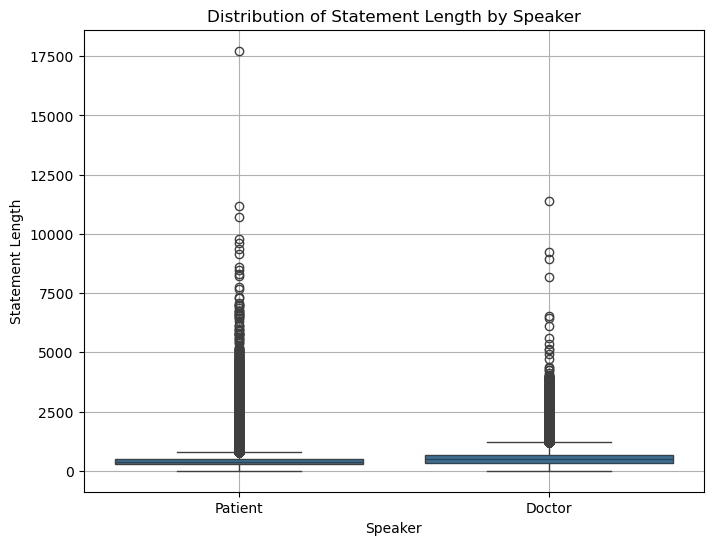

In [46]:
# Box plot to visualize the distribution of 'statement_length' by 'speaker'
plt.figure(figsize=(8, 6))
sns.boxplot(x='speaker', y='statement_length', data=df)
plt.title('Distribution of Statement Length by Speaker')
plt.xlabel('Speaker')
plt.ylabel('Statement Length')
plt.grid(True)
plt.show()


## Removing outlier

In [47]:
import pandas as pd


# Calculate statement lengths
df['statement_length'] = df['statement'].apply(len)

# Check for outliers
outliers = df[df['statement_length'] > 12500]

# Print the outliers
print("Outliers with statement length above 12500:")
print(outliers)


Outliers with statement length above 12500:
                                                statement  speaker  \
132723  this is very long I was diagnosed with HSV 2 a...  Patient   

        statement_length  
132723             17735  


In [48]:
df = df.drop(index=132723)

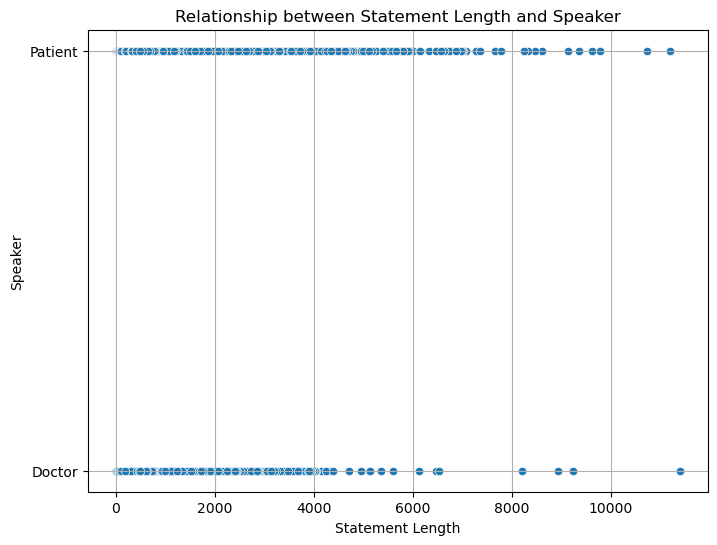

In [49]:
# Scatter plot to visualize the relationship between 'statement_length' and 'speaker'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='statement_length', y='speaker', data=df)
plt.title('Relationship between Statement Length and Speaker')
plt.xlabel('Statement Length')
plt.ylabel('Speaker')
plt.grid(True)
plt.show()

In [50]:
df.to_csv('data_cleaned.csv', index=False)

In [51]:
# ouliers are cleaned